# Foundations of Data Science
## Homework 5 

Student Name: Preksha Mutha

Student Netid: pjm526
***

### Part 1: Critique this plan (8 points)
1\. Your CIO invited his buddy from Tok Aton consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Tok Aton, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Tok Aton says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Tok Aton's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--------------------------------------------------------------------------
                            Targeted Audience Expansion             
                      Prepared by Tok Aton Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Tok Aton) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adoption of the service by a consumer, based on the data on your current customers of this service.  The model will be based on their demographics and their usage of the service. We believe that logistic regression is the best choice of method because it is a tried-and-true statistical modeling technique, and we can easily interpret the coefficients of the model to infer whether the attributes are statistically significant, and whether they make sense. If they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake. We will apply the model to our large database of consumers, and select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe.  To these we will send the targeted offer. As this is a fixed-profit-per-customer service, this also will in effect rank them by expected profit.
--------------------------------------------------------------------------
```

In [ ]:
1. For training the model, they have only considered the current customers of the service. This might result in a selection bias as only the current customers are consider in the predictive model. 
A better alternative would be to train the model on both the customers who subscribed to the service and those who did not to give non biased outcomes.

2. Logistic Regression might not be the best suited model.
Logistic Regression requires all independent variables to be identified in order to work properly and it also requires observations to be independent, ie, it does not take into consideration the relationship between the observations. 
A better alternative would be to use unsupervised learning algorithms as a preprocessing step and then use the generated labels for the predictive model i.e.(use clustering to cluster the data points into similar groups and using these cluster labels as independent variables in Logistic Regression.)

3. The features consists of demographics and usage of services which might not be enough to build a good model.
A better alternative would be to get more data of the current customers like likes, dislikes, friends and family groups, other subscribed services, influenced by etc and then model the data.
This will help to classify customers more accurately who are likely to subscribe to the service.

4. Statistically significant attributes will not provide a good measure of accuracy.
It will give the likehood between attributes present in the dataset rather than accuracy which won't give the accurate degree of service uptake. A better alternative would be to use other evaluation metrics such as AUC, F-1 score to validate the accuracy of the model.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [4]:
import pandas as pd
import numpy as np
from collections import defaultdict, deque
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [5]:
data = pd.read_csv('wiki-RfA.txt',sep='\n',header = None)
file = defaultdict(deque)

for row in data[0]:
    keys, values = row.split(':', 1)
    file[keys].append(values)
    
final = DataFrame.from_dict(file)
final



SRC           TGT VOT RES   YEA                   DAT  \
0                 Steel1943           BDD   1   1  2013  23:13, 19 April 2013   
1                Cuchullain           BDD   1   1  2013  01:04, 20 April 2013   
2                 INeverCry           BDD   1   1  2013  23:43, 19 April 2013   
3                 Cncmaster           BDD   1   1  2013  00:11, 20 April 2013   
4                Miniapolis           BDD   1   1  2013  00:56, 20 April 2013   
5             Sven Manguard           BDD   1   1  2013  01:53, 20 April 2013   
6             Ramaksoud2000           BDD   1   1  2013  02:00, 20 April 2013   
7             RockMagnetist           BDD   1   1  2013  02:18, 20 April 2013   
8                   Carrite           BDD   1   1  2013  02:22, 20 April 2013   
9               Someguy1221           BDD   1   1  2013  03:09, 20 April 2013   
10                   Secret           BDD   1   1  2013  03:18, 20 April 2013   
11             Dennis Brown           BDD   1   1  2013  03:20, 20 April 2013   
12                     MJ94           BDD   1   1  2013  03:25, 20 April 2013   
13           King of Hearts           BDD   1   1  2013  03:28, 20 April 2013   
14            Go Phightins!           BDD   1   1  2013  03:39, 20 April 2013   
15                   Hahc21           BDD   1   1  2013  04:49, 20 April 2013   
16                TBrandley           BDD   1   1  2013  07:04, 20 April 2013   
17                    Mazca           BDD   1   1  2013  11:08, 20 April 2013   
18            Pratyya Ghosh           BDD   1   1  2013  14:26, 20 April 2013   
19               Film at 11           BDD   1   1  2013  15:27, 20 April 2013   
20                  Nyttend           BDD   1   1  2013  15:51, 20 April 2013   
21               SlimVirgin           BDD   1   1  2013  16:35, 20 April 2013   
22                 Ducknish           BDD   1   1  2013  16:53, 20 April 2013   
23             Bluerasberry           BDD   1   1  2013  17:08, 20 April 2013   
24                DanielTom           BDD   1   1  2013  17:47, 20 April 2013   
25        RightCowLeftCoast           BDD   1   1  2013  18:37, 20 April 2013   
26      Boing! said Zebedee           BDD   1   1  2013  18:47, 20 April 2013   
27               Shadowjams           BDD   1   1  2013  19:42, 20 April 2013   
28              Tolly4bolly           BDD   1   1  2013  19:50, 20 April 2013   
29              NintendoFan           BDD   1   1  2013  20:51, 20 April 2013   
...                     ...           ...  ..  ..   ...                   ...   
198245             Ark30inf    Stan Shebs   1   1  2003     03:54, 2 Oct 2003   
198246           Hephaestos    Stan Shebs   1   1  2003     04:42, 2 Oct 2003   
198247                         Stevertigo   1   1  2003                         
198248                 Cyan     Sugarfish   1   1  2003    04:41, 18 Sep 2003   
198249         Jwrosenzweig     Sugarfish   1   1  2003    04:49, 18 Sep 2003   
198250                Jiang         Timwi   1   1  2003    21:56, 11 Dec 2003   
198251       Daniel Quinlan         Timwi   1   1  2003                         
198252         Secretlondon         Timwi   1   1  2003                         
198253              Pakaran         Timwi   1   1  2003    21:59, 11 Dec 2003   
198254                  Cyp         Timwi   1   1  2003    23:55, 11 Dec 2003   
198255               Menchi         Timwi   1   1  2003    04:13, 13 Dec 2003   
198256            Mark Ryan         Timwi   1   1  2003    14:22, 13 Dec 2003   
198257     Greenmountainboy         Timwi   1   1  2003    18:13, 14 Dec 2003   
198258               Angela         Timwi   1   1  2003    04:29, 18 Dec 2003   
198259               Menchi    Tompagenet   0   1  2003                         
198260             Ark30inf      Tristanb   1   1  2003     04:54, 9 Oct 2003   
198261          Jake Nelson      Tristanb   1   1  2003     08:19, 9 Oct 2003   
198262           Alexandros      Tristanb   1   1  2003

2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [6]:
final['VOT'] = final['VOT'].replace(['-1', '0'], 0)
final['VOT'] = final['VOT'].replace('1', 1)
final.VOT.value_counts()


1    144451
0     53824
Name: VOT, dtype: int64

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [7]:
X = final['TXT']
Y = final['VOT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [8]:
binary_count_vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', binary = True)
binary_count_vectorizer.fit(X_train)
X_train_binary = binary_count_vectorizer.transform(X_train)
X_test_binary = binary_count_vectorizer.transform(X_test)


tfidf_count_vectorizer = TfidfVectorizer(ngram_range = (1, 2), stop_words = 'english', binary = True)
tfidf_count_vectorizer.fit(X_train)
X_train_tfidf = tfidf_count_vectorizer.transform(X_train)
X_test_tfidf = tfidf_count_vectorizer.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

In [9]:
models = [(LogisticRegression(), "LR"), (BernoulliNB(), "NB")]
train_test = [(X_train_binary, X_test_binary, "binary"), (X_train_tfidf, X_test_tfidf, "tfidf")]

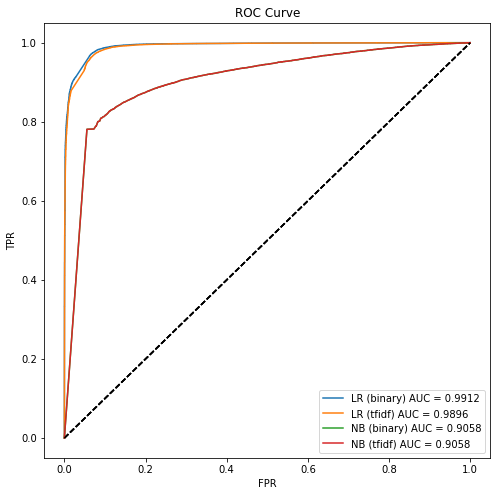

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

for model, model_name in models:
    for train, test, method_used in train_test:
        model.fit(train, y_train)
        auc_score = metrics.roc_auc_score(y_test, model.predict_proba(test)[:, 1])
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(test)[:, 1])
        plt.plot(fpr, tpr, label = model_name + " (" + method_used + ") AUC = " + str(round(auc_score, 4)))
        plt.plot([0,1], [0, 1], color = 'black', linestyle = '--')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

From the above plot,Logistic Regression Model works better as it's AUC score is higher than the BernoulliNB model.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [10]:
import networkx as nx

datalist = {'SRC': final['SRC'], 'DEST': final['TGT'], 'VOT': Y}
network = DataFrame(datalist)
network = network[['SRC','DEST','VOT']]

network['SRC'].replace('', np.nan, inplace = True)
network['DEST'].replace('', np.nan, inplace = True)
network.dropna(subset = ['SRC', 'DEST'], inplace = True)

network['SRC'] = network['SRC'].astype('category')
network['DEST'] = network['DEST'].astype('category')
network['SRC'] = pd.to_numeric(network['SRC'].cat.codes)
network['DEST'] = pd.to_numeric(network['DEST'].cat.codes)
network


SRC  DEST  VOT
0       8524   269    1
1       2046   269    1
2       4107   269    1
3       1860   269    1
4       5997   269    1
5       8678   269    1
6       7382   269    1
7       7651   269    1
8       1594   269    1
9       8364   269    1
10      8010   269    1
11      2414   269    1
12      5514   269    1
13      5026   269    1
14      3590   269    1
15      3805   269    1
16      8724   269    1
17      5791   269    1
18      7162   269    1
19      3155   269    1
20      6598   269    1
21      8269   269    1
22      2685   269    1
23      1207   269    1
24      2214   269    1
25      7585   269    1
26      1245   269    1
27      8076   269    1
28      9197   269    1
29      6476   269    1
...      ...   ...  ...
198244  9486  2841    1
198245   713  2841    1
198246  3927  2841    1
198248  2069  2876    1
198249  4814  2876    1
198250  4571  3049    1
198251  2202  3049    1
198252  8012  3049    1
198253  6826  3049    1
198254  2089  3049    1
198255  5851  3049    1
198256  5659  3049    1
198257  3676  3049    1
198258   557  3049    1
198259  5851  3075    0
198260   713  3104    1
198261  4398  3104    1
198262   399  3104    1
198263  6594  3104    1
198264  4213  3104    1
198265  2202  3129    1
198266  2394  3129    1
198267  3927  3129    1
198268  5851  3157    1
198269  2069  3157    1
198270    35  3157    1
198271   557  3245    1
198272  4571  3245    1
198273  6826  3245    1
198274  4588  3360    1

[196614 rows x 3 columns]

In [11]:
import pickle

with open('edgefile.txt', 'wb') as e:
    pickle.dump(network, e)

2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [59]:
Gwik = nx.Graph()

for i, row in network.iterrows():
    Gwik.add_edge(row[0], row[1], attr_dict = row[2:].to_dict())

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [13]:
print(nx.info(Gwik))

Name: 
Type: Graph
Number of nodes: 10416
Number of edges: 187928
Average degree:  36.0845


4\. Compute the degree, betweness and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [39]:
list(nx.degree_centrality(Gwik).values())



[0.09389400921658986,
 0.0006720430107526882,
 0.001728110599078341,
 0.0009600614439324117,
 0.002304147465437788,
 0.005568356374807988,
 0.05539554531490015,
 0.009504608294930876,
 0.0025921658986175116,
 0.012480798771121352,
 0.010848694316436251,
 0.004608294930875576,
 0.018337173579109065,
 0.0020161290322580645,
 0.003360215053763441,
 0.0022081413210445467,
 0.004512288786482335,
 0.007680491551459293,
 0.001056067588325653,
 0.009696620583717359,
 0.003552227342549923,
 0.003360215053763441,
 0.014976958525345621,
 0.008352534562211982,
 0.0022081413210445467,
 0.002880184331797235,
 0.0015360983102918587,
 0.0049923195084485405,
 0.00412826420890937,
 0.0016321044546850998,
 0.002784178187403994,
 0.007776497695852535,
 0.004224270353302612,
 0.009984639016897081,
 0.0037442396313364054,
 0.002304147465437788,
 0.017665130568356373,
 0.0052803379416282645,
 0.006528417818740399,
 0.004608294930875576,
 0.015360983102918587,
 0.0006720430107526882,
 0.002976190476190476,
 0

In [36]:
nx.closeness_centrality(Gwik)

{0: 0.47679209008514145,
 1: 0.2927076015174933,
 2: 0.31718383629221353,
 3: 0.29513770826249575,
 4: 0.33700012941633234,
 5: 0.3606897984624974,
 6: 0.42372467659262875,
 7: 0.3564071856287425,
 8: 0.3350812288885314,
 9: 0.36784856618166406,
 10: 0.3800211609325404,
 11: 0.3486293804598855,
 12: 0.38205626673513554,
 13: 0.33421035744080085,
 14: 0.3508961056461393,
 15: 0.31979368149580917,
 16: 0.3656533033770975,
 17: 0.36906069517769197,
 18: 0.2950039651070579,
 19: 0.37423202673085904,
 20: 0.33582667010575185,
 21: 0.3520465069118194,
 22: 0.37766497461928933,
 23: 0.36578171091445427,
 24: 0.343015214384509,
 25: 0.33049879426323137,
 26: 0.31995085240362464,
 27: 0.36431044734356965,
 28: 0.353012946519352,
 29: 0.3215906634968662,
 30: 0.35743454239730965,
 31: 0.3684340843974391,
 32: 0.3621822733752912,
 33: 0.36892997556051427,
 34: 0.3566512583461736,
 35: 0.32519512956603186,
 36: 0.38221047996477325,
 37: 0.36484640442747557,
 38: 0.36749814769078787,
 39: 0.3581473

In [37]:
list(nx.betweenness_centrality(Gwik).values())

[0.044014281555769336,
 2.3264465897416263e-06,
 1.3117070246496869e-05,
 5.495124082260516e-06,
 1.0825802160366162e-05,
 0.0002591747219423795,
 0.009222564284003058,
 0.0007497699776185605,
 2.1153860425604466e-05,
 0.0010067935694305934,
 0.0006776126398376053,
 0.000124003158493122,
 0.0012897574680109359,
 2.763526809740656e-05,
 0.00022831996016072276,
 0.0002639712291753733,
 0.0005067343583062474,
 0.0004782223616581899,
 0.0001928236699942898,
 0.0005301901186443962,
 0.0002782750658793306,
 1.999179706048649e-05,
 0.0007114359678266159,
 0.0002088991335614756,
 1.904674166501803e-05,
 1.924249791826451e-05,
 4.284149270703351e-06,
 0.0002807511654238039,
 0.0001480552589737368,
 1.806051551360022e-05,
 3.2732849035688195e-05,
 9.156774780962611e-05,
 8.942578947446257e-05,
 0.0011854005256543268,
 2.36496246839694e-05,
 2.2288372689010872e-05,
 0.0017388687649154302,
 8.591264294712035e-05,
 0.0003384850833197685,
 5.4991448042412926e-05,
 0.0010413504731866324,
 8.920480051

In [ ]:
The degree of the graph is the number of edges incident to the vertex.
It tells you how interconnected the nodes are in a network and hence it is meaningful.

Closeness Centrality is a nearness measure of the degree to which an individual is near all other individuals in a network.
The nodes with the highest closeness centrality value are the important nodes and hence it is meaningful.

Betweenness Centrality is a measure of how many shortest paths pass through a particular node.
The more the number of shortest paths that pass through the node, the more central the node is to the network.
Thus, Betweenness Centrality is meaningful as it tells us which nodes are more important or have higher connections.

As a result, the above three measures gives an idea about the internal representation of a graph and it's structure along with node importance.

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (3 points)

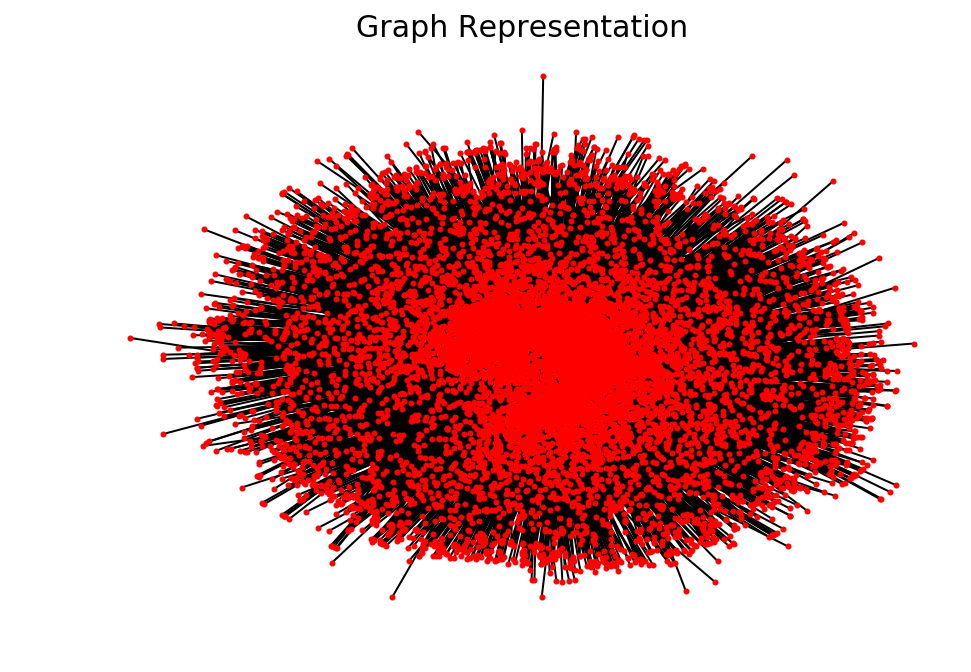

In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
nx.draw(Gwik, node_size = 4, node_color = 'red')
plt.title('Graph Representation', size=15)
plt.show()

C:\Users\preks\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


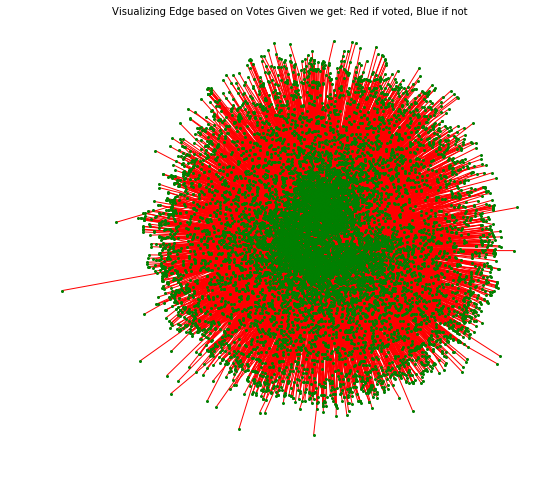

In [77]:
plt.figure(figsize = (9, 8))
plt.axis("off")

voted = [(u,v) for u,v,e in Gwik.edges(data=True) if e['VOT'] == 1]
votedAgainst = [(u,v) for u,v,e in Gwik.edges(data=True) if e['VOT'] == 0]

position = nx.spring_layout(Gwik)
nx.draw_networkx_nodes(Gwik, pos = position, node_size = 4, node_color = 'green')
nx.draw_networkx_edges(Gwik, pos = position, edgelist = voted, edge_color = 'r', edge_size = 4)
nx.draw_networkx_edges(Gwik, pos = position, edgelist = votedAgainst, edge_color = 'b', edge_size = 4)
plt.title('Visualizing Edge based on Votes Given we get: Red if voted, Blue if not', size=10)
plt.show()

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (Optional, for a bonus: 2 points)

In [29]:
network['RES'] = final['RES']

In [31]:
for i, row in network.iterrows():
    Gwik.add_edge(row[0], row[1], attr_dict = 'RES')

In [36]:
Gwik.edges(data = True)

EdgeDataView([(0, 10241, {'attr_dict': 'RES'}), (0, 4357, {'attr_dict': 'RES'}), (0, 3718, {'attr_dict': 'RES'}), (0, 4104, {'attr_dict': 'RES'}), (0, 6282, {'attr_dict': 'RES'}), (0, 663, {'attr_dict': 'RES'}), (0, 4340, {'attr_dict': 'RES'}), (0, 1175, {'attr_dict': 'RES'}), (0, 5144, {'attr_dict': 'RES'}), (0, 8857, {'attr_dict': 'RES'}), (0, 7215, {'attr_dict': 'RES'}), (0, 2333, {'attr_dict': 'RES'}), (0, 8222, {'attr_dict': 'RES'}), (0, 8223, {'attr_dict': 'RES'}), (0, 9968, {'attr_dict': 'RES'}), (0, 5026, {'attr_dict': 'RES'}), (0, 5028, {'attr_dict': 'RES'}), (0, 2085, {'attr_dict': 'RES'}), (0, 5105, {'attr_dict': 'RES'}), (0, 2984, {'attr_dict': 'RES'}), (0, 9645, {'attr_dict': 'RES'}), (0, 6045, {'attr_dict': 'RES'}), (0, 7860, {'attr_dict': 'RES'}), (0, 3509, {'attr_dict': 'RES'}), (0, 4791, {'attr_dict': 'RES'}), (0, 10168, {'attr_dict': 'RES'}), (0, 4793, {'attr_dict': 'RES'}), (0, 7998, {'attr_dict': 'RES'}), (0, 4673, {'attr_dict': 'RES'}), (0, 5571, {'attr_dict': 'RES

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize = (20, 20))
plt.axis("off")

node_Elected = [v for u,v,e in Gwik.edges(data=True) if e['RES'] == '1']
node_notElected = [v for u,v,e in Gwik.edges(data=True) if e['RES'] == '-1']

nx.draw_networkx_nodes(Gwik, pos = spring_pos, nodelist = node_Elected, node_size = 8, node_color = 'yellow',label = 'Elected')
nx.draw_networkx_nodes(Gwik, pos = spring_pos, nodelist = node_notElected, node_size = 8, node_color = 'blue',label = 'Not Elected')
nx.draw_networkx_edges(Gwik, pos = spring_pos, edgelist = voted, edge_color = 'green', edge_size = 4)
nx.draw_networkx_edges(Gwik, pos = spring_pos, edgelist = votedAgainst, edge_color = 'r', edge_size = 4)
plt.title('Nodes: Yellow if Elected, Blue if not; Edges: Green if voted +ve, Red if voted -ve', size=15)
plt.show()